In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import seaborn as sns
import os

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('bmh')

import sys
sys.path.append('../')
from embedding_analysis import *

from gensim.models import Word2Vec
%pprint # turn pretty printing off  

Pretty printing has been turned OFF


# Train word embeddings model

In [ ]:
models_by_year = {}

for year in range(2017, 2022):
    df = pickle.load(open('data/data_' + str(year) + '_clean', 'rb'))
    texts = df.tokens
    models_by_year[year] = Word2Vec(sentences=texts, size=300, window=6, 
                                    min_count=5, workers=10, sg=1, hs=0, negative=5, iter=10)

In [3]:
models_bigram_by_year = {}

for year in range(2017, 2022):
    df = pickle.load(open('data/data_' + str(year) + '_clean', 'rb'))
    texts = df.bigrams
    models_bigram_by_year[year] = Word2Vec(sentences=texts, size=300, window=6, 
                                           min_count=5, workers=10, sg=1, hs=0, negative=5, iter=10)

In [4]:
pickle.dump(models_by_year, open('models/word2vec_by_year_malay_uni_300d_6w', 'wb'))
pickle.dump(models_bigram_by_year, open('models/word2vec_by_year_malay_bi_300d_6w', 'wb'))

In [5]:
models_by_year

{2017: <gensim.models.word2vec.Word2Vec object at 0x000001C25D7FAA60>, 2018: <gensim.models.word2vec.Word2Vec object at 0x000001C2001C21F0>, 2019: <gensim.models.word2vec.Word2Vec object at 0x000001C2001B2100>, 2020: <gensim.models.word2vec.Word2Vec object at 0x000001C25D7FAA00>, 2021: <gensim.models.word2vec.Word2Vec object at 0x000001C295EE2E80>}

In [6]:
model = models_by_year[2018]

print(model.corpus_count)
print(model.wv.vectors.shape)

37277
(31193, 300)


# Identify representative group vectors

- Malays:  `'bumiputera', 'bumiputra', 'melayu', 'kaum melayu', 'orang melayu', 'bangsa melayu', 'masyarakat melayu', 'pribumi'` 
- Indians: `'kaum india', 'orang india', 'bangsa india', 'masyarakat india'`
- Chinese: `'kaum cina', 'orang cina', 'bangsa cina', 'masyarakat cina'`

In [3]:
# Load trained models
models_by_year = pickle.load(open('models/word2vec_by_year_malay_uni_300d_6w', 'rb'))
models_bi_by_year = pickle.load(open('models/word2vec_by_year_malay_bi_300d_6w', 'rb'))
models_by_year

{2017: <gensim.models.word2vec.Word2Vec object at 0x000001589DB25190>, 2018: <gensim.models.word2vec.Word2Vec object at 0x00000159191A7E20>, 2019: <gensim.models.word2vec.Word2Vec object at 0x00000159445A6CD0>, 2020: <gensim.models.word2vec.Word2Vec object at 0x000001594A320E20>, 2021: <gensim.models.word2vec.Word2Vec object at 0x000001594F66E310>}

In [4]:
# Examine the usage of group words in each year
malays = ['bumiputera', 'bumiputra', 'melayu', 'kaum melayu', 'orang melayu', 'bangsa melayu', 'pribumi', 'masyarakat melayu']
malays_wo_melayu = ['bumiputera', 'bumiputra', 'kaum melayu', 'orang melayu', 'bangsa melayu', 'pribumi', 'masyarakat melayu']
indians = ['kaum india', 'orang india', 'bangsa india', 'masyarakat india']
chineses = ['kaum cina', 'orang cina', 'bangsa cina', 'masyarakat cina']

for year in range(2017, 2022):
    print(year)
    print([malay for malay in malays if malay in models_by_year[year].wv.vocab])
    print([chinese for chinese in chineses if chinese in models_by_year[year].wv.vocab])
    print([indian for indian in indians if indian in models_by_year[year].wv.vocab])

2017
['bumiputera', 'bumiputra', 'melayu', 'kaum melayu', 'orang melayu', 'bangsa melayu', 'pribumi', 'masyarakat melayu']
['kaum cina', 'orang cina', 'bangsa cina', 'masyarakat cina']
['kaum india', 'orang india', 'bangsa india', 'masyarakat india']
2018
['bumiputera', 'bumiputra', 'melayu', 'kaum melayu', 'orang melayu', 'bangsa melayu', 'pribumi', 'masyarakat melayu']
['kaum cina', 'orang cina', 'bangsa cina', 'masyarakat cina']
['kaum india', 'orang india', 'bangsa india', 'masyarakat india']
2019
['bumiputera', 'bumiputra', 'melayu', 'kaum melayu', 'orang melayu', 'bangsa melayu', 'pribumi', 'masyarakat melayu']
['kaum cina', 'orang cina', 'bangsa cina', 'masyarakat cina']
['kaum india', 'orang india', 'bangsa india', 'masyarakat india']
2020
['bumiputera', 'bumiputra', 'melayu', 'kaum melayu', 'orang melayu', 'bangsa melayu', 'pribumi', 'masyarakat melayu']
['kaum cina', 'orang cina', 'bangsa cina', 'masyarakat cina']
['kaum india', 'orang india', 'bangsa india', 'masyarakat indi

In [5]:
df = pd.DataFrame()

for year in range(2017, 2022):
    df_temp = pickle.load(open('data/data_' + str(year) + '_clean', 'rb'))
    df = pd.concat([df, df_temp])

df.shape

(154946, 7)

In [5]:
df_ind = get_freq_by_year(indians, df).sum(axis=0).sort_values(ascending=False).reset_index()
df_ind.columns = ['noun', 'count']
df_ind['group'] = 'Indians'

df_chi = get_freq_by_year(chineses, df).sum(axis=0).sort_values(ascending=False).reset_index()
df_chi.columns = ['noun', 'count']
df_chi['group'] = 'Chinese'

df_mal = get_freq_by_year(malays, df).sum(axis=0).sort_values(ascending=False).reset_index()
df_mal.columns = ['noun', 'count']
df_mal['group'] = 'Malays'

df_bar = pd.concat([df_ind, df_chi, df_mal])
df_bar.head()

,noun,count,group
0,masyarakat india,1218,Indians
1,kaum india,557,Indians
2,orang india,68,Indians
3,bangsa india,58,Indians
0,masyarakat cina,782,Chinese


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


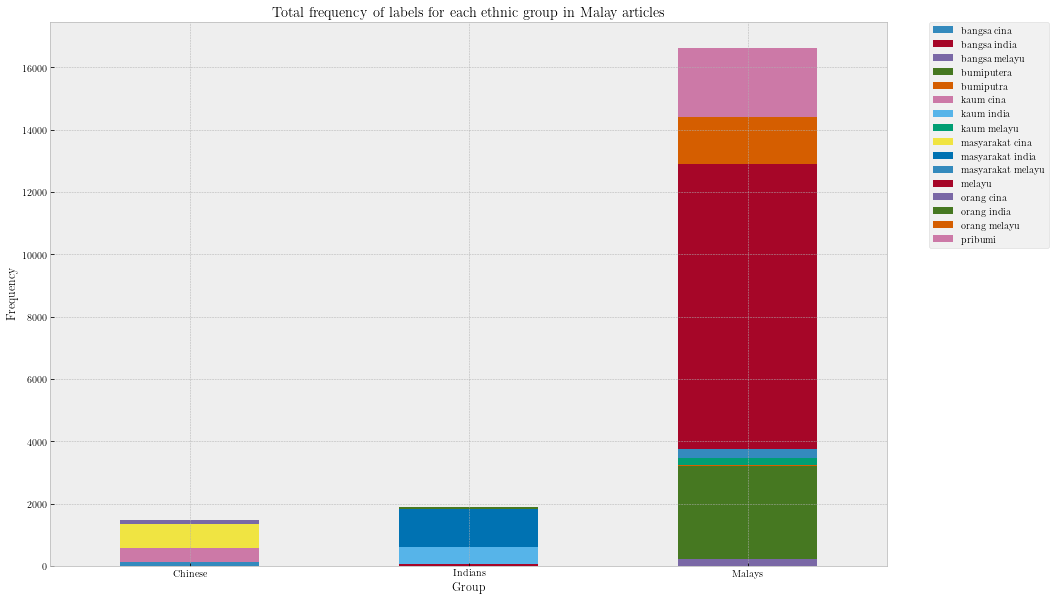

In [6]:
ax = df_bar.pivot(index='group', columns='noun', values='count').plot(kind='bar', stacked=True, figsize=(15, 10))
ax.set_xlabel("Group")
ax.set_ylabel("Frequency")
ax.set_title("Total frequency of labels for each ethnic group in Malay articles")
plt.xticks(rotation=360)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('figs/malay_total_freq_labels.eps', format='eps')

In [7]:
df_ind = get_freq_by_year(indians, df).sum(axis=0).sort_values(ascending=False).reset_index()
df_ind.columns = ['noun', 'count']
df_ind['group'] = 'Indians'

df_chi = get_freq_by_year(chineses, df).sum(axis=0).sort_values(ascending=False).reset_index()
df_chi.columns = ['noun', 'count']
df_chi['group'] = 'Chinese'

df_mal = get_freq_by_year(malays_wo_melayu, df).sum(axis=0).sort_values(ascending=False).reset_index()
df_mal.columns = ['noun', 'count']
df_mal['group'] = 'Malays'

df_bar = pd.concat([df_ind, df_chi, df_mal])
df_bar.head()

,noun,count,group
0,masyarakat india,1218,Indians
1,kaum india,557,Indians
2,orang india,68,Indians
3,bangsa india,58,Indians
0,masyarakat cina,782,Chinese


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


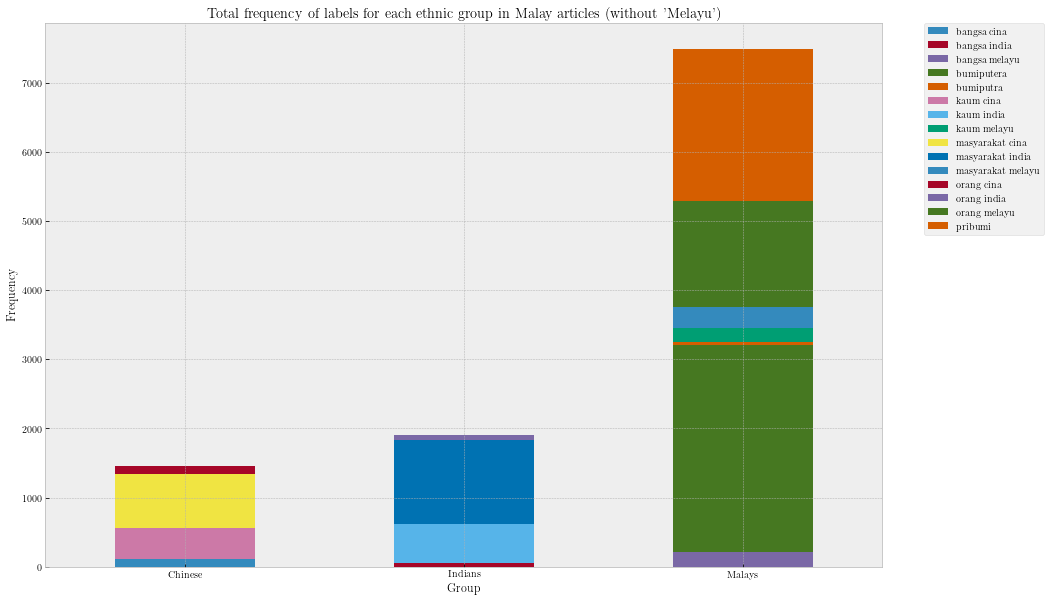

In [8]:
ax = df_bar.pivot(index='group', columns='noun', values='count').plot(kind='bar', stacked=True, figsize=(15, 10))
ax.set_xlabel("Group")
ax.set_ylabel("Frequency")
ax.set_title("Total frequency of labels for each ethnic group in Malay articles (without 'Melayu')")
plt.xticks(rotation=360)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('figs/malay_total_freq_labels_wo_melayu.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


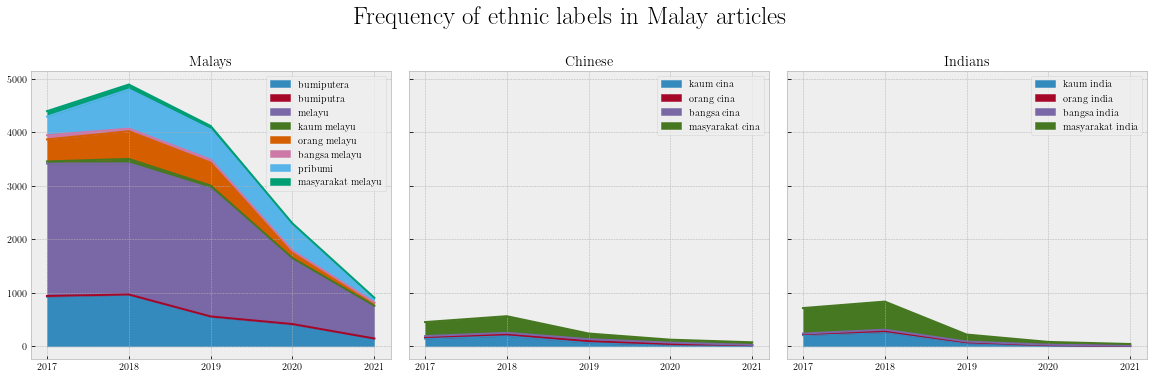

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
axes = axes.flatten()
title = 'Frequency of ethnic labels in Malay articles'
labels = [malays, chineses, indians]
subtitles = ['Malays', 'Chinese', 'Indians']

for idx in range(len(axes)):
    ax = axes[idx]
    get_freq_by_year(labels[idx], df).plot.area(ax=ax)
    ax.locator_params(integer=True)
    ax.set_title(subtitles[idx])

fig.suptitle(title, fontsize=25)
plt.subplots_adjust(top=0.8, bottom=0, wspace=0.05, hspace=0.2)
plt.savefig('figs/malay_freq_labels.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


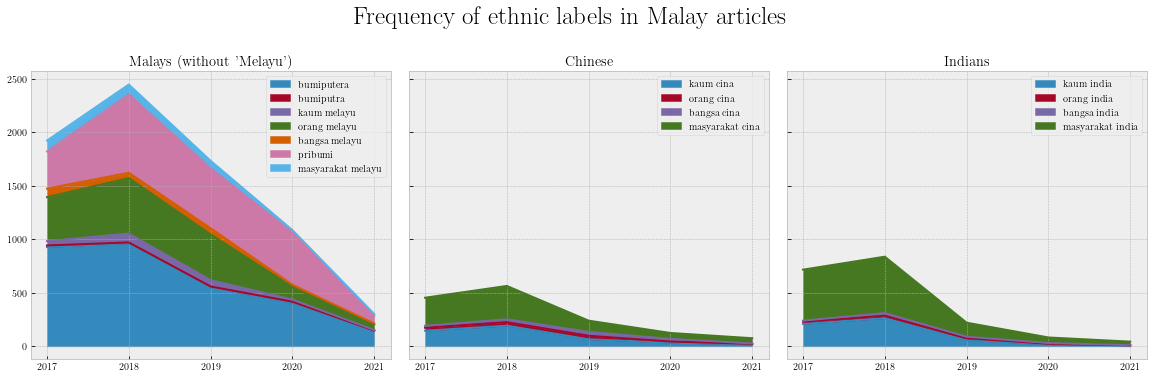

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
axes = axes.flatten()
title = 'Frequency of ethnic labels in Malay articles'
labels = [malays_wo_melayu, chineses, indians]
subtitles = ['Malays (without \'Melayu\')', 'Chinese', 'Indians']

for idx in range(len(axes)):
    ax = axes[idx]
    get_freq_by_year(labels[idx], df).plot.area(ax=ax)
    ax.locator_params(integer=True)
    ax.set_title(subtitles[idx])

fig.suptitle(title, fontsize=25)
plt.subplots_adjust(top=0.8, bottom=0, wspace=0.05, hspace=0.2)
plt.savefig('figs/malay_freq_labels_wo_melayu.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


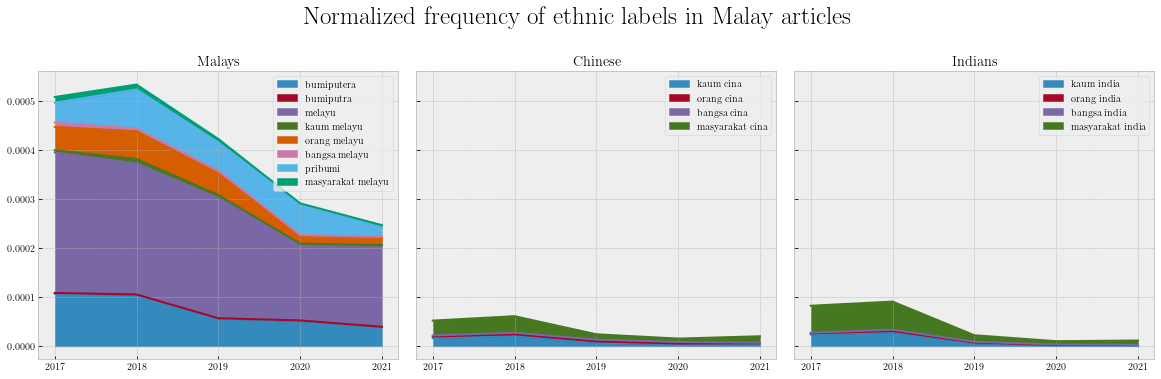

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
axes = axes.flatten()
title = 'Normalized frequency of ethnic labels in Malay articles'
labels = [malays, chineses, indians]
subtitles = ['Malays', 'Chinese', 'Indians']

for idx in range(len(axes)):
    ax = axes[idx]
    get_freq_by_year(labels[idx], df, True).plot.area(ax=ax)
    ax.locator_params(integer=True)
    ax.set_title(subtitles[idx])

fig.suptitle(title, fontsize=25)
plt.subplots_adjust(top=0.8, bottom=0, wspace=0.05, hspace=0.2)
plt.savefig('figs/malay_freq_normalized_labels.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


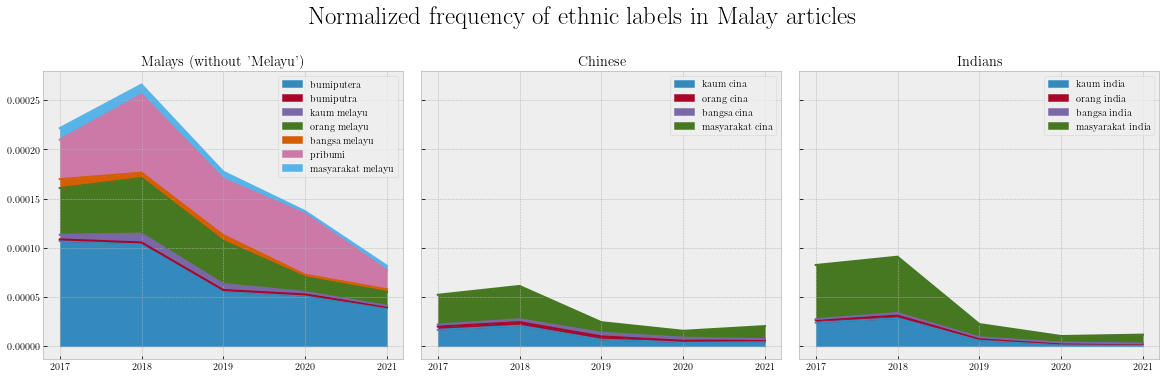

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
axes = axes.flatten()
title = 'Normalized frequency of ethnic labels in Malay articles'
labels = [malays_wo_melayu, chineses, indians]
subtitles = ['Malays (without \'Melayu\')', 'Chinese', 'Indians']

for idx in range(len(axes)):
    ax = axes[idx]
    get_freq_by_year(labels[idx], df, True).plot.area(ax=ax)
    ax.locator_params(integer=True)
    ax.set_title(subtitles[idx])

fig.suptitle(title, fontsize=25)
plt.subplots_adjust(top=0.8, bottom=0, wspace=0.05, hspace=0.2)
plt.savefig('figs/malay_freq_normalized_labels_wo_melayu.eps', format='eps')

In [30]:
get_freq_by_year(malays, df).sum(axis=0).sort_values(ascending=False)

melayu               9135
bumiputera           2988
pribumi              2196
orang melayu         1526
masyarakat melayu     303
bangsa melayu         217
kaum melayu           207
bumiputra              47
dtype: int64

In [66]:
get_freq_by_year(chineses, df).sum(axis=0).sort_values(ascending=False)

masyarakat cina    782
kaum cina          456
orang cina         111
bangsa cina        110
dtype: int64

In [67]:
get_freq_by_year(indians, df).sum(axis=0).sort_values(ascending=False)

masyarakat india    1218
kaum india           557
orang india           68
bangsa india          58
dtype: int64

# Identify stereotypes vectors

- Types of stereotypes
    1. physical appearances
    2. personal qualities
    3. economic status
    4. occupations
    
 
- Steps of compiling adjectives/nouns for stereotypes (1)-(3)
    1. Select the most common adjectives based on raw frequency 
    2. Select the adjectives that are closest to each ethnic group
    3. Include adjectives of interest

## 1. Most common adjectives

In [6]:
from wordcloud import WordCloud

In [7]:
# Get all pos_adj_year files
files = [file for file in os.listdir('data') if 'pos_adj' in file]
print(len(files))

adjs = []
for file in files:
    adjs.extend(pickle.load(open('data/' + file, 'rb')))

adjs = [adj for adj in adjs if len(adj)!= 1]
print(len(adjs))

5
3637695


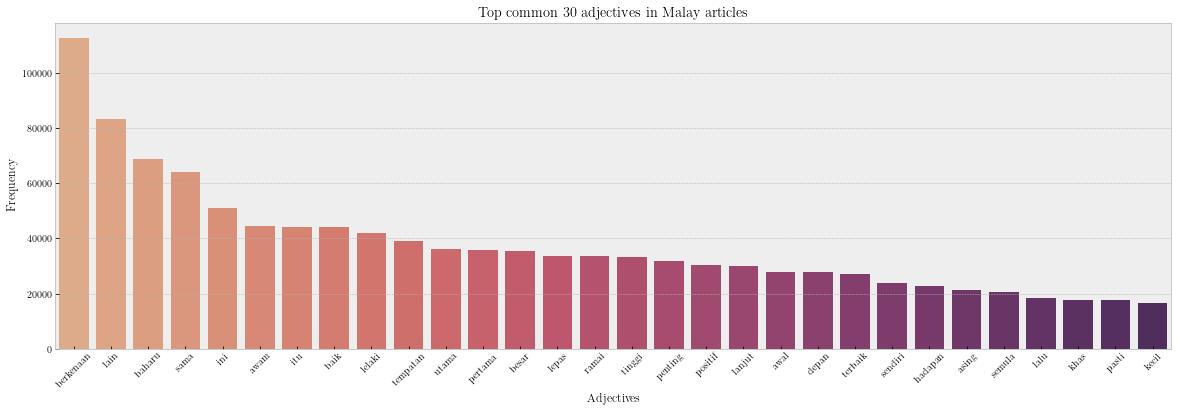

In [8]:
data = pd.Series(adjs).value_counts()[0:30]

fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(x=data.index,y=data.values, palette="flare")

ax.set_xlabel("Adjectives")
ax.set_ylabel("Frequency")
ax.set_title("Top common 30 adjectives in Malay articles")
plt.xticks(rotation=45)
plt.savefig('figs/malay_top_adjs.eps', format='eps')

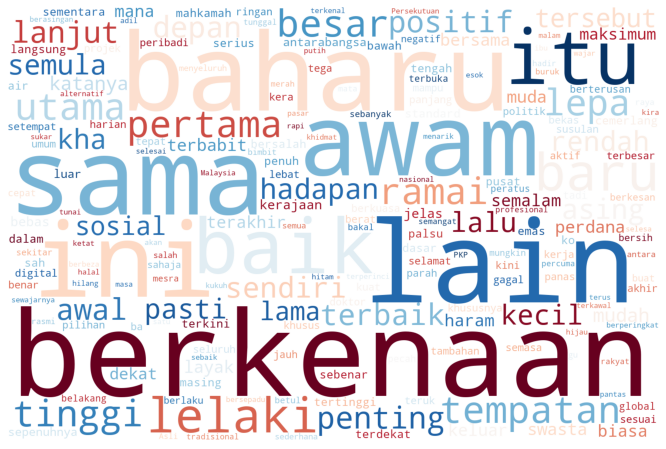

In [98]:
# Plot a word cloud
fig, axs = plt.subplots(figsize=(25, 8))
wordcloud = WordCloud(width=1500, height=1000, 
                      prefer_horizontal=1,
                      background_color='white', 
                      collocations=False, 
                      colormap='RdBu', 
                      relative_scaling = 0.2,
                      min_word_length = 2,
                      min_font_size=15).generate(' '.join(adjs))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [99]:
pd.Series(adjs).value_counts().index[0:200].tolist()

['berkenaan', 'lain', 'baharu', 'sama', 'ini', 'awam', 'itu', 'baik', 'lelaki', 'tempatan', 'utama', 'pertama', 'besar', 'lepas', 'ramai', 'tinggi', 'penting', 'positif', 'lanjut', 'awal', 'depan', 'terbaik', 'sendiri', 'hadapan', 'asing', 'semula', 'lalu', 'khas', 'pasti', 'kecil', 'rendah', 'tersebut', 'sosial', 'lama', 'baru-baru', 'mudah', 'perdana', 'swasta', 'katanya', 'terbabit', 'layak', 'terakhir', 'muda', 'haram', 'semalam', 'keluar', 'biasa', 'maksimum', 'dekat', 'baru', 'kerajaan', 'bersama', 'jelas', 'bebas', 'sepenuhnya', 'luar', 'sah', 'antarabangsa', 'tertinggi', 'penuh', 'serius', 'bersalah', 'air', 'kos', 'tengah', 'terdekat', 'emas', 'sementara', 'langsung', 'palsu', 'terkini', 'cemerlang', 'mahkamah', 'bawah', 'standard', 'dalam', 'sebenar', 'khususnya', 'setempat', 'sesuai', 'kini', 'mampu', 'kuat', 'dasar', 'digital', 'berkuasa', 'umum', 'selamat', 'pusat', 'gagal', 'tegas', 'khusus', 'seluruh', 'keras', 'terbesar', 'panjang', 'lebat', 'berat', 'tadi', 'bas', 'tam

- physical appearances: `'tinggi', 'muda'`
- personal qualities: `'baik', 'utama', 'penting', 'positif', 'terbaik', 'asing', 'khas', 'layak', 'bebas', 'bersalah', 'cemerlang', 'mampu', 'kuat', 'berkuasa',  'gagal', 'tegas', 'khusus', 'teruk', 'aktif', 'negatif', 'mesra', 'sederhana', 'salah', 'profesional', 'buruk', 'tradisional', 'kukuh', 'pantas', 'rapi', 'berbeza', 'istimewa'`
- socioeconomic status: `'sukar'`
- other possible adjs: `'lanjut'`

## 2. Adjectives that are closest to each ethnic group

In [100]:
dict_adj_malay = get_close_adj(malays, models_by_year, adjs, n=200)
dict_adj_malay.keys()

dict_keys(['bumiputera', 'bumiputra', 'melayu', 'kaum melayu', 'orang melayu', 'bangsa melayu', 'pribumi', 'masyarakat melayu'])

In [488]:
dict_adj_malay['masyarakat melayu']

{'berhijab', 'asam', 'beriani', 'auta', 'tembikar', 'kekok', 'memperlihat', 'vintaj', 'moyang', 'bahulu', 'disuburkan', 'mempesonakan', 'pengukir', 'estetika', 'pepatah', 'mengharmonikan', 'keperibadian', 'seluruhnya', 'keramahan', 'berkecil', 'tatapan', 'larang', 'watan', 'manakan', 'bersosial', 'masyarkat', 'ilmuwan', 'sosiobudaya', 'dibenci', 'akidah', 'tampak', 'sosiopolitik', 'keseragaman', 'sehati', 'tagal', 'berswafoto', 'pedas', 'bermuafakat', 'kerena', 'jinak', 'glamor', 'fairy', 'transeksual', 'keduniaan', 'capal', 'gentleman', 'anutan', 'wangian', 'perpecahan', 'kekitaan', 'persuratan', 'pastilah', 'pengislaman', 'midin', 'unduk', 'loka', 'kesefahaman', 'berabad', 'putar', 'medley', 'pemanis', 'memasaknya', 'sajian', 'eranya', 'kemegahan', 'bisi', 'leluhur', 'seruling', 'keterangkuman', 'bermasyarakat', 'kemelayuan', 'ketimuran', 'siam', 'kapitalisme', 'seninya', 'berpadanan', 'tradisinya', 'pepudak', 'spiderman', 'malayalee', 'dalamkalangan', 'budaya', 'patin', 'melayu', 'n

- physical appearances: `'menua', 'berseri', 'segak'`
- personal qualities: `'berpengetahuan', 'berwawasan', 'berkelayakan', 'intelektual', 'liberal', 'superb', 'sepadu', 'berkemahiran', 'penengah', 'kapitalis', 'terpelajar', 'madani', 'wise', 'berilmu', 'populis', 'sekular', 'berdaya', 'bermatlamat', 'rentan', 'sederhana', 'bersatu', 'perkasa', 'berjasa', 'tertindas','vegetarian', 'spekulatif', 'sosialis', 'pelik', 'kontemporari', 'tersohor', 'berbudi', 'tradisional', 'dwibahasa', 'tradisonal', 'kuno', 'sejati', 'luhur', 'cauvinis', 'majmuk', 'berkebolehan', 'perihatin', 'berbilang', 'lalai', 'gerun', 'dibenci', 'disayangi', 'korup', 'elitis', 'gelisah', 'berbudi', 'toleransi', 'skeptikal', 'mundur', 'kesah', 'populis', 'ekstremis', 'angkuh', 'fanatik', 'murung', 'rasis', 'konservatif', 'bermaya', 'pendiam', 'hipokrit', 'lembut', 'beremosi', 'takbur', 'jahil', 'dikagumi', 'sinis', 'peramah', 'karut', 'berdosa', 'muak', 'kedekut', 'patriotik', 'dicemburui', 'berlagak', 'zionis', 'kleptokrat', 'bongkak', 'taat', 'malas', 'rasional', 'bersederhana', 'sombong', 'beramanah', 'emosional', 'bertoleransi', 'berbudaya', 'cacamarba', 'jumud', 'nasionalis', 'kredibel', 'disisihkan', 'pelampau', 'periang', 'kental', 'dangkal', 'progresif', 'bermaruah', 'idealisme', 'apartheid', 'gentleman', 'nasionalisme', 'extremisme'`
- economic status: `'terpinggir', 'dominan', 'berpengaruh'`

In [231]:
dict_adj_chi = get_close_adj(chineses, models_by_year, adjs, n=200)
dict_adj_chi.keys()

dict_keys(['kaum cina', 'orang cina', 'bangsa cina', 'masyarakat cina'])

In [563]:
dict_adj_chi['masyarakat cina']

{'malayalee', 'pengundi', 'keharmonian', 'kelaziman', 'patriotisme', 'carilah', 'menjunjung', 'auta', 'cai', 'cintakan', 'terkira', 'merdu', 'dikotakan', 'kavadi', 'dibudayakan', 'silih', 'kekok', 'muhibah', 'thaipusam', 'penghuninya', 'menawan', 'memperlihat', 'seabad', 'krathong', 'prasejarah', 'tanglung', 'menyelerakan', 'gendang', 'kehalusan', 'banjar', 'bidan', 'rasis', 'mempesonakan', 'terompah', 'beremosi', 'sambutan', 'keceriaan', 'etnik', 'kesibukan', 'halamannya', 'parti', 'dirindui', 'deepavali', 'tarian', 'resam', 'jelata', 'tradisional', 'menyelami', 'ngadau', 'mulung', 'beragama', 'ketokohan', 'menganut', 'tradisi', 'zapin', 'keperibadian', 'perpatih', 'lengang', 'silu', 'kebiasaan', 'visinya', 'cina', 'keramahan', 'teknokrat', 'berkecil', 'harmoni', 'partinya', 'sakti', 'kunjung', 'pengantin', 'tradisionalnya', 'inklusiviti', 'rakyat', 'manakan', 'terbukanya', 'butiknya', 'masyakat', 'kearah', 'kemaslahatan', 'dijamu', 'minoriti', 'berkeluarga', 'tosai', 'sambut', 'makan

- physical appearances: `'menua'`
- personal qualities: `'fanatik', 'rasis', 'dangkal', 'berlagak', 'konservatif', 'tradisional', 'jahil', 'beragama', 'bersederhana', 'beramal', 'destruktif', 'sombong', 'berpendidikan', 'terhormat',  'dibenci', 'skeptikal', 'dominan', 'peramah', 'muak', 'disayangi', 'kapitalis', 'cacamarba', 'vulnerable', 'idealisme', 'mundur', 'emosional', 'cauvinis', 'sekular', 'majmuk', 'penyabar', 'vegetarian', 'pasif', 'gentleman', 'bongkak', 'wrong', 'elitis', 'kapitalisme', 'nasionalisme', 'lucu', 'berbudi', 'toleransi', 'malas', 'lokek', 'angkuh', 'tulus', 'rasis', 'silu', 'sosialisme', 'hipokrit', 'pandai', 'pemurah', 'beremosi', 'patriotik', 'bodoh', 'realisitik', 'lembam', 'runsing', 'lokek', 'kesian', 'bingung', 'berkebolehan', 'tertindas', 'patriotisme', 'tradisonal'`
- economic status: `'berpengaruh', 'terpinggir'`

In [61]:
dict_adj_ind = get_close_adj(indians, models_by_year, adjs, n=200)
dict_adj_ind.keys()

dict_keys(['kaum india', 'orang india', 'bangsa india', 'masyarakat india'])

In [80]:
dict_adj_ind['masyarakat india']

{'showcase', 'perpaduan', 'berstrata', 'kepemimpinan', 'loka', 'ekonominya', 'masyakat', 'gurdwara', 'releven', 'memfokus', 'intipatinya', 'kemanisan', 'tekun', 'mikro', 'yag', 'muallaf', 'berbudi', 'sejati', 'gawai', 'langganan', 'padukan', 'merakyatkan', 'kepimpinannya', 'dayak', 'kerisik', 'dimantapkan', 'mundur', 'kesenangan', 'kehadapan', 'tamil', 'kelirukan', 'pendesak', 'asnaf', 'pengundi', 'motto', 'stereotaip', 'sebetulnya', 'terbersih', 'menghayati', 'dijamu', 'akujanji', 'menua', 'menghebatkan', 'berpaksikan', 'tibanya', 'ritual', 'wkb', 'semeriah', 'melestarikan', 'meremajakan', 'kesah', 'benang', 'pemboleh', 'bn', 'bermatlamat', 'pemudah', 'slogan', 'bermastautin', 'muruku', 'keriangan', 'bahtera', 'sabil', 'dihasratkan', 'imput', 'menghidangkan', 'keilmuan', 'digiatkan', 'muhibah', 'perihatin', 'komuniti', 'mencorakkan', 'mendaya', 'hairanlah', 'pemudi', 'linopot', 'tagal', 'rayanya', 'memayungi', 'millennial', 'komitmennya', 'pimpinannya', 'kecendekiaan', 'isi', 'inklusi

- physical appearances: `'menua'`
- personal qualities: `'lalai',  'dwibahasa', 'disayangi', 'korup', 'berkeperluan', 'berbudi', 'tradisional', 'berwawasan', 'liberal', 'berpelesiran', 'berilmu', 'berkebolehan', 'hiperaktif', 'vegetarian', 'tamak', 'berpendidikan', 'bermaruah', 'vulnerable', 'idealisme', 'cauvinis', 'sekular', 'pemurah', 'cacamarba', 'emosional', 'realisitik', 'tekun', 'gerun', 'lucu', 'berlagak', 'kesian', 'kedekut', 'nasionalis', 'lembam', 'sosialisme', 'sombong', 'iri', 'janggal', 'tulus', 'terorisme' `
- economic status: `'miskin', 'terpinggir', 'disisihkan', 'berpencen', 'fakir', 'asnaf'`

## 3. Adjectives of interest

- personal qualities: `'holistik', 'keusahawanan', 'berkeupayaan', 'seimbang', 'berdikari', 'lemah', 'terbuka', 'regresif'`
- socioeconomic status: `'kaya', 'mewah', 'senang', 'berada', 'berpangkat', 'pendalaman', 'memerlukan'`

## 4. Occupations 

- Steps of compiling occupations
    1. Occupations closest to each ethnic group
       - `'agamawan', 'doktor', 'usahawan', 'dermawan', 'penggubal', 'petani', 'mahasiswa', 'mahasiswi', 'mubaligh', 'kontraktor', 'francaisor', 'pemasar', 'perunding', 'seranta', 'pentaksir', 'penyair', 'ilmuwan', 'rektor', 'pendebat', 'pembimbing', 'penari', 'pengukir', 'penghibur', 'teknokrat', 'guru', 'pendidik', 'pejawat', 'penghibur', 'pendandan', 'pelacur', 'veteran', 'pemimpin'`
    2. Occupations from Garg et al. (2018) 
        - `'bidan', 'bailif', 'pelelong', 'jurugambar', 'atlet', 'juruwang', 'penari', 'akauntan', 'doktor gigi', 'penenun', 'pandai besi', 'penyelia', 'juruukur', 'penjahit', 'pereka', 'mekanik', 'buruh', 'broker', 'pustakawan', 'pembantu', 'pemuzik', 'saintis', 'pelaut', 'pengajar', 'sheriff', 'juruterbang', 'pemeriksa', 'pentadbir', 'arkitek', 'pengumpul', 'pengendali', 'pemandu', 'pelukis', 'konduktor', 'jururawat', 'jurutera', 'pesara', 'jurujual', 'peguam', 'paderi', 'doktor', 'petani', 'kerani', 'pengurus', 'penjaga', 'artis', 'smith', 'pejabat', 'polis', 'doktor', 'profesor', 'pelajar', 'hakim', 'guru', 'pengarang', 'setiausaha', 'askar'`
        - Note that occupations that consist of 2 words are omitted

# Calculate cosine distance between vectors

In [9]:
malays_filtered = filter_word_by_occurrence(malays, models_by_year)
print(malays_filtered)

chinese_filtered = filter_word_by_occurrence(chineses, models_by_year)
print(chinese_filtered)

indians_filtered = filter_word_by_occurrence(indians, models_by_year)
print(indians_filtered)

['bumiputera', 'melayu', 'kaum melayu', 'orang melayu', 'bangsa melayu', 'pribumi', 'masyarakat melayu']
['kaum cina', 'orang cina', 'masyarakat cina']
['kaum india', 'masyarakat india']


In [10]:
adjs = set(adjs)
len(adjs)

30872

## Identify closest words and adjectives 

In [11]:
for malay in malays_filtered:
    print(malay)
    print(get_close_word(malay, models_by_year, 10).to_markdown())

bumiputera
|      | 0         | 1            | 2         | 3         | 4        | 5           | 6           | 7         | 8                | 9             |
|-----:|:----------|:-------------|:----------|:----------|:---------|:------------|:------------|:----------|:-----------------|:--------------|
| 2017 | teraju    | ahb          | tkb       | carve     | superb   | ownership   | pesaka      | usahawan  | dananita         | naroden       |
| 2018 | beep      | pesaka       | superbumi | meb       | usahawan | bumiputra   | jpb         | destini   | orang melayu     | tube          |
| 2019 | bumiputra | dilonggarkan | dmb       | mudahcara | ncr      | menyatupadu | matrikulasi | ntep      | usahawanusahawan | bangsa melayu |
| 2020 | bumiputra | teraju       | pertunas  | bumitra   | pesaka   | ncr         | asb         | koperkasa | mpbpp            | petanah       |
| 2021 | beep      | tunas        | ypu       | mpbpp     | mpc      | hdc         | teraju      | informal  | me

In [10]:
get_close_word('kaum melayu', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,orang melayu,masyarakat melayu,kaum cina,orang cina,bercelaru,kaumkaum,penutur,mendaulatkan,perhatiannya,bersandiwara,ketuanan,bisi,terpelajar,pendekatannya,cauvinis,melupai,polarisasi,peranakan,mandailing,didasari
2018,orang melayu,kaumkaum,kaum,kaum cina,masyarakat melayu,orang cina,tionghua,kaum india,masyarakat cina,kadazan,orang india,kdm,pengundinya,sahabatsahabat,majoritinya,bangsa cina,kaumnya,momogun,ipf,champa
2019,kaum cina,menganuti,bangsa melayu,kaum india,kaum,kaumnya,sekular,kaumkaum,masyarakat melayu,mengapiapikan,iban,kadazan,karut,orang melayu,ketaksuban,chetti,orang cina,korup,bangsa cina,menganut
2020,kaum cina,kadazan,tionghua,masyarakat melayu,menua,masyarakatnya,kaum,vishu,orang india,orang melayu,orang cina,iban,melanau,peranakan,turuntemurun,menganut,dialek,biperoh,bangsa melayu,anutan
2021,retorik,meresahkan,memperjuang,mengusahakannya,naluri,dituturkan,menyayangi,terikut,kesah,tersisih,diperjuangkan,angkuh,dekati,konservatif,sejarahnya,takdir,menjaganya,berterus,bersahaja,perbalahan


In [12]:
get_close_word('masyarakat melayu', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,orang cina,kaum melayu,melanau,orang melayu,telugu,bisi,tionghua,kemelayuan,selako,ketuanan,melayu,kehalusan,melupai,mandailing,tradisi,kdm,ketimuran,odissi,kelabit,peranakan
2018,kaum melayu,kaum cina,masyarakat cina,resam,keramahan,tionghua,orang melayu,bercakaran,pengundinya,champa,rungus,lundayeh,keilmuan,melanau,kanaq,kaum,penduduknya,turuntemurun,kadazan,kdm
2019,dialek,orang cina,chetti,melanau,bangsa melayu,menganuti,kaumnya,loghat,gaul,jerunei,budayanya,zapin,masyarakatnya,berzaman,riaulingga,kaum cina,temuan,sukusuku,kaum melayu,kaumkaum
2020,perpatih,biperoh,melanau,tionghua,kaum melayu,banian,masyarakatnya,dialek,resam,diceriakan,berzikir,bertamadun,bidayuh,kadazan,nostalgia,pupuk,mulung,menua,kaum cina,moyang
2021,peranakan,loka,keenakan,gaul,banjar,digemari,bekok,nostalgia,peminatnya,bidan,bidayuh,kari,sinonim,menggemari,hairanlah,menggamit,kaum melayu,seabad,gemarkan,kuihmuih


In [13]:
get_close_word('orang melayu', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,kaum melayu,bercelaru,hilangnya,bangsa melayu,berpecahbelah,antimelayu,syiarnya,ketuanan,kekuasaan,orang cina,cauvinis,diperlekeh,bercakaran,eranya,beristiqamah,bersandiwara,bermusuhan,leluhur,maslahat,kedaifan
2018,kaum melayu,orang cina,bangsa melayu,kaumkaum,ketuanan,bercakaran,antimelayu,umnobn,menggadaikan,kembalilah,melayu,cauvinis,terhapus,kelirukan,sahabatsahabat,kesatupaduan,masyarakat melayu,kucar,kacir,kaumnya
2019,orang cina,bangsa melayu,diperlekehkan,konon,menyatupadu,berpecahbelah,bangsanya,kaum melayu,mengkhianati,korup,usahlah,masyarakat melayu,menganuti,bercakaran,melayu,hipokrit,kaum cina,kaumkaum,ketaksuban,landasannya
2020,kaum melayu,orang cina,melanau,orang india,kaum,masyarakat melayu,bertamadun,nasionalisme,suarasuara,berakhlak,banian,retorik,peribumi,resam,tatasusila,bangsa cina,kaum cina,penjajah,kadazan,idealisme
2021,bangsa melayu,memperjuang,idealisme,memperjuangkan,ideologi,memecahbelahkan,cintakan,orang cina,majmuk,memperkecilkan,menyatupadukan,reformasi,diperjuangkan,perpecahan,kemesraan,kesederhanaan,perjuangannya,retorik,liberal,berpecah


In [17]:
get_close_adj_by_year('kaum melayu', models_by_year, adjs, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,bisi,terpelajar,cauvinis,didasari,mundur,partinya,agamawan,eranya,dahagakan,leluhur,seangkatan,berpadanan,skeptikal,melayu,hilangnya,nasionalisme,auta,maslahah,tertindas,maslahat
2018,kaum,majoritinya,melayu,cauvinis,kelirukan,anutan,perihatin,berbilang,dacing,minoriti,mengundinya,onsoi,pengundi,membangkit,kembalilah,elitis,untungnya,kerena,majmuk,dekati
2019,kaum,sekular,karut,ketaksuban,korup,menganut,bermusuh,anutan,ibunda,retorik,bertelingkah,sehaluan,hipokrit,pecat,rasis,minoriti,tertindas,pendesak,bersengketa,diciplak
2020,menua,kaum,menganut,anutan,kesederhanaan,pantang,resam,kekitaan,perpatih,gembiranya,tatasusila,nasionalisme,berbilang,keagungan,silaturrahim,vaisakhi,malayalee,menebal,pendiam,keterangkuman
2021,retorik,naluri,kesah,angkuh,dekati,konservatif,sejarahnya,takdir,perbalahan,terpesong,warisannya,persaudaraan,pewaris,murung,suaranya,dirindui,silam,merendah,denyut,kecintaan


In [14]:
for chinese in chinese_filtered:
    print(chinese)
    print(get_close_word(chinese, models_by_year, 10).to_markdown())

kaum cina
|      | 0               | 1           | 2               | 3           | 4           | 5           | 6                 | 7                 | 8        | 9           |
|-----:|:----------------|:------------|:----------------|:------------|:------------|:------------|:------------------|:------------------|:---------|:------------|
| 2017 | masyarakat cina | kaum melayu | kaum india      | kaum        | orang cina  | cina        | kaumkaum          | melanau           | hakka    | tionghua    |
| 2018 | masyarakat cina | kaum melayu | tionghua        | orang cina  | orang india | kaum india  | kaum              | masyarakat melayu | tionghoa | pengundinya |
| 2019 | kaum melayu     | orang cina  | masyarakat cina | orang india | kaum india  | chetti      | masyarakat melayu | menganuti         | taoism   | iban        |
| 2020 | kadazan         | kaum melayu | orang cina      | tionghua    | melanau     | orang india | nyonya            | masyarakat melayu | murut    | peranaka

In [30]:
get_close_word('kaum cina', models_by_year, 10)

,0,1,2,3,4,5,6,7,8,9
2017,masyarakat cina,kaum melayu,kaum india,kaum,orang cina,cina,kaumkaum,melanau,hakka,tionghua
2018,masyarakat cina,kaum melayu,tionghua,orang cina,orang india,kaum india,kaum,masyarakat melayu,tionghoa,pengundinya
2019,kaum melayu,orang cina,masyarakat cina,orang india,kaum india,chetti,masyarakat melayu,menganuti,taoism,iban
2020,kadazan,kaum melayu,orang cina,tionghua,melanau,orang india,nyonya,masyarakat melayu,murut,peranakan
2021,tionghoa,kaum india,manakan,dermawan,merayakan,huazong,bangsa melayu,fleksibiliti,murut,jasanya


In [16]:
get_close_adj_by_year('kaum cina', models_by_year, adjs, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,kaum,cina,dayak,cauvinis,bisi,vegetarian,minoriti,mca,rasis,pimpinannya,pengundi,bn,seangkatan,tradisinya,pengharapan,musyawarah,partinya,etnik,pembangkang,parti
2018,kaum,pengundi,cina,kelirukan,majoritinya,minoriti,selesanya,majority,tandingi,siyasi,melayu,solid,onsoi,indahnya,tahaluf,mengundinya,cauvinis,bn,memperlihat,faktornya
2019,kaum,minoriti,dijamu,liberal,ketaksuban,sekular,menganut,bermusuh,cina,salahnya,etnik,stereotaip,diciplak,ibunda,kunjung,bersederhana,lesbian,pepecahan,sambut,ritual
2020,nyonya,pantang,menua,andainya,lantang,gembiranya,anutan,sombong,kaum,tarian,kekitaan,nian,kemanisan,mengagumi,peramah,moyang,pemurah,sumazau,penggemarnya,khat
2021,manakan,dermawan,fleksibiliti,jasanya,kiralah,persiapkan,berbilang,khatib,dekati,kepemimpinan,menghidangkan,malayalee,bersepakat,lebaran,seru,banjar,tauliah,dahagakan,bermuhasabah,beramal


In [18]:
for indian in indians_filtered:
    print(indian)
    print(get_close_word(indian, models_by_year, 10).to_markdown())

kaum india
|      | 0                | 1           | 2                | 3             | 4        | 5              | 6               | 7           | 8          | 9              |
|-----:|:-----------------|:------------|:-----------------|:--------------|:---------|:---------------|:----------------|:------------|:-----------|:---------------|
| 2017 | masyarakat india | kaum cina   | masyarakat cina  | mic           | sedic    | mib            | kaum            | mied        | terpinggir | pemohonpemohon |
| 2018 | masyarakat india | kaum melayu | kaum cina        | kaum          | kaumkaum | orang india    | masyarakat cina | tersisih    | tionghua   | terpinggir     |
| 2019 | kaum melayu      | kaum cina   | masyarakat india | bangsa melayu | chetti   | kenyah         | idahan          | kaumnya     | kadazan    | magahau        |
| 2020 | masyarakatnya    | vishu       | huffaz           | tionghua      | biperoh  | kelebihannya   | rimup           | orang india | menua      | keib

In [19]:
get_close_word('kaum india', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,masyarakat india,kaum cina,masyarakat cina,mic,sedic,mib,kaum,mied,terpinggir,pemohonpemohon,orang cina,potensinya,kaumkaum,ipf,yns,dipinggirkan,pesarapesara,berpendapatan,orang india,brim
2018,masyarakat india,kaum melayu,kaum cina,kaum,kaumkaum,orang india,masyarakat cina,tersisih,tionghua,terpinggir,kuilkuil,mbk,spkmi,mib,golongan,ber,ipf,pengupayaan,majoritinya,seru
2019,kaum melayu,kaum cina,masyarakat india,bangsa melayu,chetti,kenyah,idahan,kaumnya,kadazan,magahau,iban,kadazandusun,masyarakat cina,melanau,bangsa cina,tionghua,penan,anjurannya,rungus,sukusuku
2020,masyarakatnya,vishu,huffaz,tionghua,biperoh,kelebihannya,rimup,orang india,menua,keibubapaan,tajwid,ilmuwan,berkebolehan,dirapatkan,malayalee,pismp,kafeteen,vulnerable,diidamkan,penabungan
2021,bermuafakat,merayakan,memperjuang,persiapkan,jeda,menyatupadukan,lupakan,utamakan,prs,berbalik,kehadapan,selaraskan,bersepakat,dipupuk,buktinya,perdebatan,kesederhanaan,bangsa melayu,bersolidariti,tunaikan


In [32]:
print(get_close_word('orang india', models_by_year, 10).to_markdown())

|      | 0          | 1         | 2          | 3          | 4           | 5           | 6           | 7            | 8            | 9        |
|-----:|:-----------|:----------|:-----------|:-----------|:------------|:------------|:------------|:-------------|:-------------|:---------|
| 2017 | orang cina | bisi      | kenalpasti | persoalkan | momogun     | hendakkan   | dipesongkan | bersandiwara | depa         | makmum   |
| 2018 | orang cina | kelirukan | kaum cina  | telugu     | majoritinya | kaum melayu | jenguk      | larang       | wakili       | kuilkuil |
| 2019 | orang cina | tuatua    | depa       | duludulu   | halau       | kecut       | tumpahnya   | sikitsikit   | nyanyi       | putar    |
| 2020 | orang cina | kadazan   | melanau    | berbangsa  | gilan       | julitah     | sergey      | dubinsky     | berketurunan | tekir    |


In [14]:
df.loc[df.article.str.lower().str.contains(r'\bbisi\b'), 'article'].iloc[1]

'Mahkamah Persekutuan hari ini memutuskan bahawa enam penduduk peribumi di Sarawak telah hilang hak ke atas Tanah Adat Peribumi (NCR) mereka selepas mereka berpindah ke penempatan lain.     Panel lima hakim dipengerusikan Ketua Hakim Negara Tun Arifin Zakaria membatalkan keputusan mahkamah rayuan yang membuat keputusan memihak kepada enam penduduk daripada kaum etnik Kelabit, Lun Bawang dan Penan itu, diketuai Racha anak Urud @ Peter Racha Urud.     Penghakiman sebulat suara itu disampaikan oleh Hakim Mahkamah Persekutuan Datuk Balia Yusof Wahi yang berkata, mereka tidak membuat akuan dalam kenyataan tuntutan mereka bahawa mereka masih pemilik tanah NCR itu dan terus mencari rezeki di tanah itu selepas berpindah ke penempatan semula itu.     Katanya mereka telah menetap di kampung masing-masing hampir 40 tahun dan dengan itu mereka bukan lagi pemilik tanah itu, yang kegiatan pembalakan telah dijalankan sejak 20 tahun lalu iaitu sebelum saman sivil itu difailkan.     Hakim Balia memberi

In [21]:
get_close_adj_by_year('kaum india', models_by_year, adjs, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,sedic,kaum,terpinggir,potensinya,berpendapatan,mundur,berbilang,ibunda,inklusiviti,mahasiswi,golongan,imput,kemenjadian,majoritinya,vegetarian,politikkan,rugilah,perihatin,hilangnya,mubaligh
2018,kaum,terpinggir,golongan,pengupayaan,majoritinya,seru,bumiputera,sedic,mengundinya,cina,minoriti,sosioekonomi,kelirukan,keciciran,pengundi,berpendapatan,samarata,berkeperluan,gabungannya,stateless
2019,anjurannya,kaum,ibunda,millennial,berpendidikan,rentan,stereotaip,ladu,pendesak,ukhwah,dayak,etnik,cina,melebar,masyakat,linguistik,peribumi,beragam,tawa,sekular
2020,huffaz,menua,keibubapaan,tajwid,ilmuwan,berkebolehan,malayalee,vulnerable,pendikir,keilmuan,iodin,insitusi,perusahan,berilmu,automatif,penggemarnya,diasuh,prauniversiti,berwawasan,sekata
2021,bermuafakat,persiapkan,jeda,lupakan,utamakan,kehadapan,bersepakat,dipupuk,buktinya,perdebatan,kesederhanaan,seru,geopolitik,fleksibiliti,dekati,retorik,cintakan,terpesong,kemesraan,idealisme


## Compute stereotypes score

In [34]:
malays_manual = ['kaum melayu']
chinese_manual = ['kaum cina']
indians_manual = ['kaum india'] #, 'masyarakat india'

In [35]:
appearances = ['tinggi', 'muda', 'menua', 'berseri', 'segak']
print(len(set(appearances)))

appear_filtered = filter_word_by_occurrence(set(appearances), models_by_year)
print(len(appear_filtered))
print(appear_filtered)

5
2
['muda', 'tinggi']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


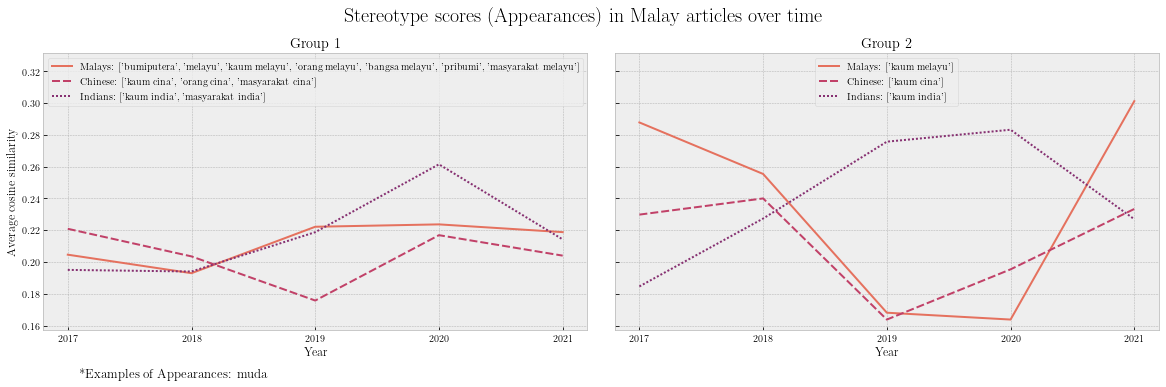

In [36]:
appear_filtered = ['muda']

# Group 1 - ethnic labels appearing in every year
dist = []

for embeddings in models_by_year.values():
    dist_malay = get_average_sim(malays_filtered, appear_filtered, embeddings)
    dist_chi = get_average_sim(chinese_filtered, appear_filtered, embeddings)
    dist_ind = get_average_sim(indians_filtered, appear_filtered, embeddings)
    dist.append([dist_malay, dist_chi, dist_ind])

df_dist_1 = pd.DataFrame(dist, index = models_by_year.keys(),
                       columns =  ['Malays: {}'.format(malays_filtered), 
                                   'Chinese: {}'.format(chinese_filtered), 
                                   'Indians: {}'.format(indians_filtered)])
    
# Group 2 - manually selected labels
dist = []
for embeddings in models_by_year.values():
    dist_malay = get_average_sim(malays_manual, appear_filtered, embeddings)
    dist_chi = get_average_sim(chinese_manual, appear_filtered, embeddings)
    dist_ind = get_average_sim(indians_manual, appear_filtered, embeddings)
    dist.append([dist_malay, dist_chi, dist_ind])

df_dist_2 = pd.DataFrame(dist, index = models_by_year.keys(),
                         columns = ['Malays: {}'.format(malays_manual), 
                                    'Chinese: {}'.format(chinese_manual), 
                                    'Indians: {}'.format(indians_manual)])

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
axes = axes.flatten()
title = 'Stereotype scores (Appearances) in Malay articles over time'
annotation = '*Examples of Appearances: ' + ', '.join(appear_filtered)

dfs = [df_dist_1, df_dist_2]

for idx in range(len(axes)):
    ax = axes[idx]
    sns.lineplot(data=dfs[idx], ax=ax, palette="flare")
    ax.locator_params(integer=True)
    ax.legend(loc='upper center')
    ax.set_title('Group ' + str(idx+1)) 
    ax.set_ybound(upper=dfs[idx].to_numpy().max()*1.1)
    ax.set_xlabel("Year")
    ax.set_ylabel("Average cosine similarity")

fig.suptitle(title, fontsize=20)
plt.subplots_adjust(top=0.85, bottom=0.08, wspace=0.05, hspace=0.2)
fig.text(0.15, -0.05, annotation, transform=fig.transFigure, fontdict={'fontsize':13})
plt.savefig('figs/malay_stereo_appear.eps', format='eps')

In [37]:
qualities = ['holistik', 'keusahawanan', 'berkeupayaan', 'seimbang', 'berdikari', 'lemah', 'terbuka', 'regresif', 
             'lalai',  'dwibahasa', 'disayangi', 'korup', 'berkeperluan', 'berbudi', 'tradisional', 'berwawasan', 
             'liberal', 'berpelesiran', 'berilmu', 'berkebolehan', 'hiperaktif', 'vegetarian', 'tamak', 'berpendidikan', 
             'bermaruah', 'vulnerable', 'idealisme', 'cauvinis', 'sekular', 'pemurah', 'cacamarba', 'emosional', 'realisitik', 
             'tekun', 'gerun', 'lucu', 'berlagak', 'kesian', 'kedekut', 'nasionalis', 'lembam', 'sosialisme', 'sombong', 'iri', 
             'janggal', 'tulus', 'terorisme', 'fanatik', 'rasis', 'dangkal', 'berlagak', 'konservatif', 'tradisional', 'jahil', 
             'beragama', 'bersederhana', 'beramal', 'destruktif', 'sombong', 'berpendidikan', 'terhormat',  'dibenci', 'skeptikal', 
             'dominan', 'peramah', 'muak', 'disayangi', 'kapitalis', 'cacamarba', 'vulnerable', 'idealisme', 'mundur', 'emosional', 
             'cauvinis', 'sekular', 'majmuk', 'penyabar', 'vegetarian', 'pasif', 'gentleman', 'bongkak', 'wrong', 'elitis', 'kapitalisme', 
             'nasionalisme', 'lucu', 'berbudi', 'toleransi', 'malas', 'lokek', 'angkuh', 'tulus', 'rasis', 'silu', 'sosialisme', 'hipokrit', 
             'pandai', 'pemurah', 'beremosi', 'patriotik', 'bodoh', 'realisitik', 'lembam', 'runsing', 'lokek', 'kesian', 'bingung', 
             'berkebolehan', 'tertindas', 'patriotisme', 'tradisonal', 'berpengetahuan', 'berwawasan', 'berkelayakan', 'intelektual', 
             'liberal', 'superb', 'sepadu', 'berkemahiran', 'penengah', 'kapitalis', 'terpelajar', 'madani', 'wise', 'berilmu', 'populis', 
             'sekular', 'berdaya', 'bermatlamat', 'rentan', 'sederhana', 'bersatu', 'perkasa', 'berjasa', 'tertindas','vegetarian', 
             'spekulatif', 'sosialis', 'pelik', 'kontemporari', 'tersohor', 'berbudi', 'tradisional', 'dwibahasa', 'tradisonal', 
             'kuno', 'sejati', 'luhur', 'cauvinis', 'majmuk', 'berkebolehan', 'perihatin', 'berbilang', 'lalai', 'gerun', 'dibenci', 
             'disayangi', 'korup', 'elitis', 'gelisah', 'berbudi', 'toleransi', 'skeptikal', 'mundur', 'kesah', 'populis', 'ekstremis', 
             'angkuh', 'fanatik', 'murung', 'rasis', 'konservatif', 'bermaya', 'pendiam', 'hipokrit', 'lembut', 'beremosi', 'takbur', 'jahil', 
             'dikagumi', 'sinis', 'peramah', 'karut', 'berdosa', 'muak', 'kedekut', 'patriotik', 'dicemburui', 'berlagak', 'zionis', 'kleptokrat', 
             'bongkak', 'taat', 'malas', 'rasional', 'bersederhana', 'sombong', 'beramanah', 'emosional', 'bertoleransi', 'berbudaya', 'cacamarba', 
             'jumud', 'nasionalis', 'kredibel', 'disisihkan', 'pelampau', 'periang', 'kental', 'dangkal', 'progresif', 'bermaruah', 'idealisme', 
             'apartheid', 'gentleman', 'nasionalisme', 'extremisme', 'baik', 'utama', 'penting', 'positif', 'terbaik', 'asing', 'khas', 'layak', 
             'bebas', 'bersalah', 'cemerlang', 'mampu', 'kuat', 'berkuasa',  'gagal', 'tegas', 'khusus', 'teruk', 'aktif', 'negatif', 'mesra', 
             'sederhana', 'salah', 'profesional', 'buruk', 'tradisional', 'kukuh', 'pantas', 'rapi', 'berbeza', 'istimewa']

print(len(set(qualities)))

qualities_filtered = filter_word_by_occurrence(set(qualities), models_by_year)
print(len(qualities_filtered))
print(qualities_filtered)

174
95
['pantas', 'layak', 'khas', 'berkeupayaan', 'istimewa', 'beragama', 'sederhana', 'patriotik', 'bermaya', 'idealisme', 'berbilang', 'berjasa', 'kesian', 'bermaruah', 'progresif', 'lembut', 'utama', 'bersatu', 'tamak', 'korup', 'gagal', 'lembam', 'positif', 'berpengetahuan', 'berkelayakan', 'berkuasa', 'beramal', 'profesional', 'asing', 'disayangi', 'cemerlang', 'negatif', 'lemah', 'keusahawanan', 'berkeperluan', 'pelik', 'sepadu', 'kental', 'dikagumi', 'mesra', 'peramah', 'kukuh', 'berilmu', 'berdikari', 'pasif', 'patriotisme', 'bertoleransi', 'bodoh', 'dominan', 'rapi', 'tradisional', 'seimbang', 'terbuka', 'teruk', 'berdosa', 'berkebolehan', 'berbudi', 'holistik', 'tersohor', 'aktif', 'bermatlamat', 'mampu', 'angkuh', 'bebas', 'buruk', 'majmuk', 'liberal', 'baik', 'perkasa', 'madani', 'gelisah', 'pandai', 'penting', 'gerun', 'janggal', 'berkemahiran', 'tekun', 'kesah', 'zionis', 'kuat', 'tegas', 'sejati', 'berdaya', 'taat', 'berbeza', 'khusus', 'toleransi', 'lalai', 'rasional',

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


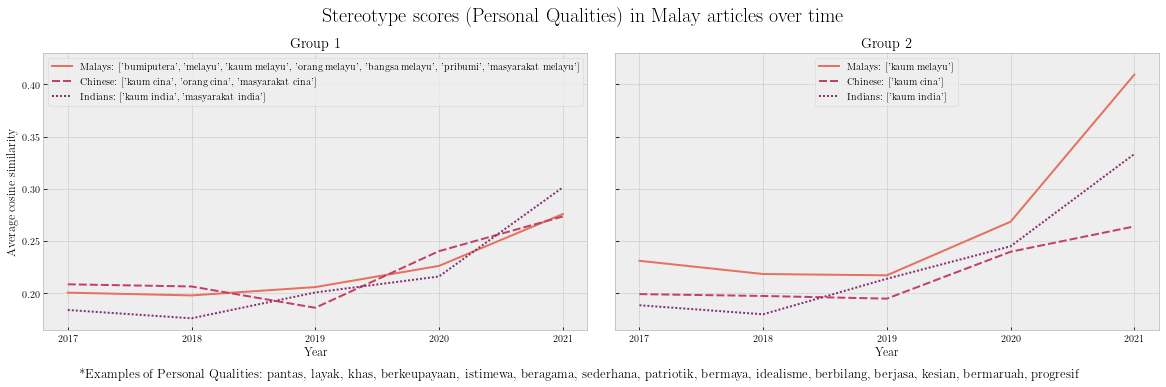

In [38]:
# Group 1 - ethnic labels appearing in every year
dist = []
for embeddings in models_by_year.values():
    dist_malay = get_average_sim(malays_filtered, qualities_filtered, embeddings)
    dist_chi = get_average_sim(chinese_filtered, qualities_filtered, embeddings)
    dist_ind = get_average_sim(indians_filtered, qualities_filtered, embeddings)
    dist.append([dist_malay, dist_chi, dist_ind])
    
df_dist_1  = pd.DataFrame(dist, index = models_by_year.keys(),
                           columns =  ['Malays: {}'.format(malays_filtered), 
                                       'Chinese: {}'.format(chinese_filtered), 
                                       'Indians: {}'.format(indians_filtered)])

# Group 2 - manually selected labels
dist = []
for embeddings in models_by_year.values():
    dist_malay = get_average_sim(malays_manual, qualities_filtered, embeddings)
    dist_chi = get_average_sim(chinese_manual, qualities_filtered, embeddings)
    dist_ind = get_average_sim(indians_manual, qualities_filtered, embeddings)
    dist.append([dist_malay, dist_chi, dist_ind])
    
df_dist_2 = pd.DataFrame(dist, index = models_by_year.keys(),
                         columns = ['Malays: {}'.format(malays_manual), 
                                    'Chinese: {}'.format(chinese_manual), 
                                    'Indians: {}'.format(indians_manual)])

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
axes = axes.flatten()
title = 'Stereotype scores (Personal Qualities) in Malay articles over time'
annotation = '*Examples of Personal Qualities: ' + ', '.join(qualities_filtered[:15]) 

dfs = [df_dist_1, df_dist_2]

for idx in range(len(axes)):
    ax = axes[idx]
    sns.lineplot(data=dfs[idx], ax=ax, palette="flare")
    ax.locator_params(integer=True)
    ax.legend(loc='upper center')
    ax.set_title('Group ' + str(idx+1)) 
    ax.set_ybound(upper=dfs[idx].to_numpy().max()*1.05)
    ax.set_xlabel("Year")
    ax.set_ylabel("Average cosine similarity")

fig.suptitle(title, fontsize=20)
plt.subplots_adjust(top=0.85, bottom=0.08, wspace=0.05, hspace=0.2)
fig.text(0.15, -0.05, annotation, transform=fig.transFigure, fontdict={'fontsize':13})
plt.savefig('figs/malay_stereo_pq.eps', format='eps')

In [39]:
economic = ['sukar', 'terpinggir', 'dominan', 'berpengaruh', 'kaya', 'mewah', 
            'senang', 'berada', 'berpangkat', 'pendalaman', 'memerlukan', 'miskin', 
            'terpinggir', 'disisihkan', 'berpencen', 'fakir', 'asnaf']
print(len(set(economic)))

economic_filtered = filter_word_by_occurrence(set(economic), models_by_year)
print(len(economic_filtered))
print(economic_filtered)

16
14
['asnaf', 'berpangkat', 'kaya', 'senang', 'pendalaman', 'mewah', 'berada', 'memerlukan', 'terpinggir', 'miskin', 'fakir', 'berpengaruh', 'sukar', 'dominan']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


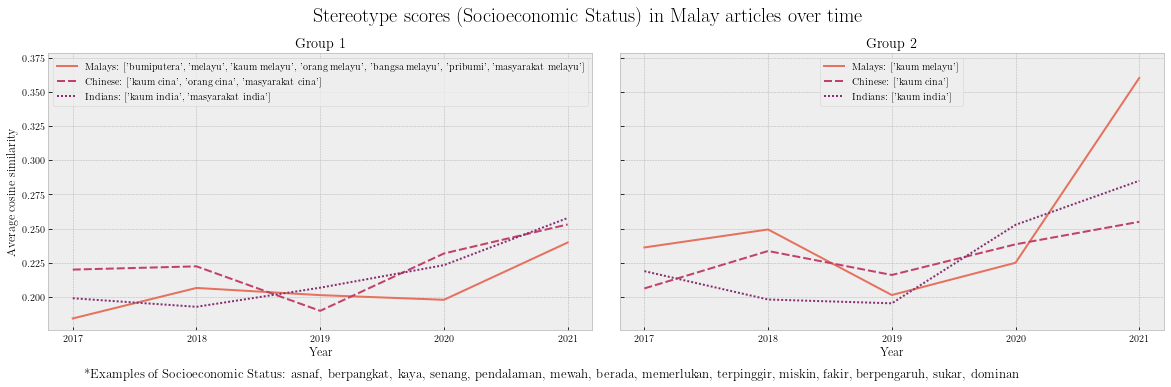

In [40]:
# Group 1 - ethnic labels appearing in every year
dist = []

for embeddings in models_by_year.values():
    dist_malay = get_average_sim(malays_filtered, economic_filtered, embeddings)
    dist_chi = get_average_sim(chinese_filtered, economic_filtered, embeddings)
    dist_ind = get_average_sim(indians_filtered, economic_filtered, embeddings)
    dist.append([dist_malay, dist_chi, dist_ind])
    
df_dist_1  = pd.DataFrame(dist, index = models_by_year.keys(),
                           columns =  ['Malays: {}'.format(malays_filtered), 
                                       'Chinese: {}'.format(chinese_filtered), 
                                       'Indians: {}'.format(indians_filtered)])

# Group 2 - manually selected labels
dist = []
for embeddings in models_by_year.values():
    dist_malay = get_average_sim(malays_manual, economic_filtered, embeddings)
    dist_chi = get_average_sim(chinese_manual, economic_filtered, embeddings)
    dist_ind = get_average_sim(indians_manual, economic_filtered, embeddings)
    dist.append([dist_malay, dist_chi, dist_ind])
    
df_dist_2 = pd.DataFrame(dist, index = models_by_year.keys(),
                         columns = ['Malays: {}'.format(malays_manual), 
                                    'Chinese: {}'.format(chinese_manual), 
                                    'Indians: {}'.format(indians_manual)])

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
axes = axes.flatten()
title = 'Stereotype scores (Socioeconomic Status) in Malay articles over time'
annotation = '*Examples of Socioeconomic Status: ' + ', '.join(economic_filtered[:15]) 

dfs = [df_dist_1, df_dist_2]

for idx in range(len(axes)):
    ax = axes[idx]
    sns.lineplot(data=dfs[idx], ax=ax, palette="flare")
    ax.locator_params(integer=True)
    ax.legend(loc='upper center')
    ax.set_title('Group ' + str(idx+1)) 
    ax.set_ybound(upper=dfs[idx].to_numpy().max()*1.05)
    ax.set_xlabel("Year")
    ax.set_ylabel("Average cosine similarity")

fig.suptitle(title, fontsize=20)
plt.subplots_adjust(top=0.85, bottom=0.08, wspace=0.05, hspace=0.2)
fig.text(0.15, -0.05, annotation, transform=fig.transFigure, fontdict={'fontsize':13})
plt.savefig('figs/malay_stereo_ss.eps', format='eps')

In [41]:
occupations = ['agamawan', 'doktor', 'usahawan', 'dermawan', 'penggubal', 'petani', 'mahasiswa', 
               'mahasiswi', 'mubaligh', 'kontraktor', 'francaisor', 'pemasar', 'perunding', 'seranta', 
               'pentaksir', 'penyair', 'ilmuwan', 'rektor', 'pendebat', 'pembimbing', 'penari', 'pengukir', 
               'penghibur', 'teknokrat', 'guru', 'pendidik', 'pejawat', 'penghibur', 'pendandan', 'pelacur', 
               'veteran''bidan', 'bailif', 'pelelong', 'jurugambar', 'atlet', 'juruwang', 'penari', 'akauntan', 
               'doktor gigi', 'penenun', 'pandai besi', 'penyelia', 'juruukur', 'penjahit', 'pereka', 'mekanik', 
               'buruh', 'broker', 'pustakawan', 'pembantu', 'pemuzik', 'saintis', 'pelaut', 'pengajar', 'sheriff', 
               'juruterbang', 'pemeriksa', 'pentadbir', 'arkitek', 'pengumpul', 'pengendali', 'pemandu', 'pelukis', 
               'konduktor', 'jururawat', 'jurutera', 'pesara', 'jurujual', 'peguam', 'paderi', 'doktor', 'petani', 
               'kerani', 'pengurus', 'penjaga', 'artis', 'smith', 'pejabat', 'polis', 'doktor', 'profesor', 
               'pelajar', 'hakim', 'guru', 'pengarang', 'setiausaha', 'askar']

print(len(set(occupations)))

occu_filtered = filter_word_by_occurrence(set(occupations), models_by_year)
print(len(occu_filtered))
print(occu_filtered)

81
59
['guru', 'jurugambar', 'mubaligh', 'artis', 'kerani', 'hakim', 'askar', 'petani', 'pengurus', 'pembantu', 'penari', 'pengarang', 'pentadbir', 'penggubal', 'profesor', 'perunding', 'pereka', 'pelajar', 'pembimbing', 'polis', 'jurutera', 'broker', 'buruh', 'pemandu', 'akauntan', 'dermawan', 'penyelia', 'penjaga', 'setiausaha', 'pendidik', 'juruukur', 'mekanik', 'pelaut', 'pemuzik', 'doktor', 'pengumpul', 'smith', 'usahawan', 'pemeriksa', 'pesara', 'saintis', 'agamawan', 'pengendali', 'pelacur', 'juruwang', 'jururawat', 'atlet', 'juruterbang', 'rektor', 'pengajar', 'pejabat', 'seranta', 'ilmuwan', 'pelukis', 'arkitek', 'jurujual', 'mahasiswa', 'peguam', 'kontraktor']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


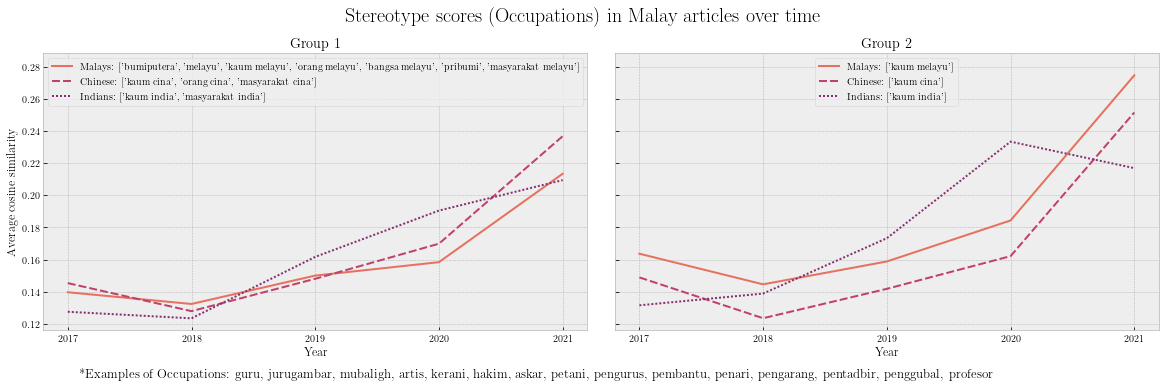

In [42]:
# Group 1 - ethnic labels appearing in every year
dist = []
for embeddings in models_by_year.values():
    dist_malay = get_average_sim(malays_filtered, occu_filtered, embeddings)
    dist_chi = get_average_sim(chinese_filtered, occu_filtered, embeddings)
    dist_ind = get_average_sim(indians_filtered, occu_filtered, embeddings)
    dist.append([dist_malay, dist_chi, dist_ind])
    
df_dist_1  = pd.DataFrame(dist, index = models_by_year.keys(),
                           columns =  ['Malays: {}'.format(malays_filtered), 
                                       'Chinese: {}'.format(chinese_filtered), 
                                       'Indians: {}'.format(indians_filtered)])


# Group 2 - manually selected labels
dist = []
for embeddings in models_by_year.values():
    dist_malay = get_average_sim(malays_manual, occu_filtered, embeddings)
    dist_chi = get_average_sim(chinese_manual, occu_filtered, embeddings)
    dist_ind = get_average_sim(indians_manual, occu_filtered, embeddings)
    dist.append([dist_malay, dist_chi, dist_ind])
    
df_dist_2 = pd.DataFrame(dist, index = models_by_year.keys(),
                         columns = ['Malays: {}'.format(malays_manual), 
                                    'Chinese: {}'.format(chinese_manual), 
                                    'Indians: {}'.format(indians_manual)])

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
axes = axes.flatten()
title = 'Stereotype scores (Occupations) in Malay articles over time'
annotation = '*Examples of Occupations: ' + ', '.join(occu_filtered[:15]) 

dfs = [df_dist_1, df_dist_2]

for idx in range(len(axes)):
    ax = axes[idx]
    sns.lineplot(data=dfs[idx], ax=ax, palette="flare")
    ax.locator_params(integer=True)
    ax.legend(loc='upper center')
    ax.set_title('Group ' + str(idx+1)) 
    ax.set_ybound(upper=dfs[idx].to_numpy().max()*1.05)
    ax.set_xlabel("Year")
    ax.set_ylabel("Average cosine similarity")

fig.suptitle(title, fontsize=20)
plt.subplots_adjust(top=0.85, bottom=0.08, wspace=0.05, hspace=0.2)
fig.text(0.15, -0.05, annotation, transform=fig.transFigure, fontdict={'fontsize':13})
plt.savefig('figs/malay_stereo_occu.eps', format='eps')

In [4]:
get_close_word('bangsa melayu', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,ketuanan,nasionalisme,orang melayu,syiarnya,ibunda,kemajmukan,melupai,kemelayuan,peradaban,dimartabatkan,mendaulatkan,beristiqamah,wasilah,dipertahan,kuncinya,idealisme,siasah,memerdekakan,polarisasi,hilangnya
2018,memperjuang,orang melayu,cauvinis,ber,pengikat,majmuk,orang cina,persilatan,dijunjung,momogun,kemuafakatan,antimelayu,kaumkaum,mendaulatkan,champa,minoriti,kadazan,memayungi,berjihad,bersendikan
2019,ber,menganuti,bangsa cina,bangsa india,masyarakat melayu,kaum melayu,kaumnya,orang melayu,bercakaran,konfusian,kaumkaum,bangsanya,ketuanan,susila,kemajmukan,ketaksuban,anutan,mengkhianati,kaum india,sandiwara
2020,ber,murtad,keagungan,zamannya,novelis,dinamika,sosok,idealisme,stereotaip,nasionalisme,menua,berwawasan,dipertahan,kesopanan,berakhlak,bertamadun,ilmuan,berbudi,anutan,denyut
2021,orang melayu,majmuk,berterus,retorik,berpecah,memperjuang,setiakawan,kemesraan,kaum melayu,kesederhanaan,perjuangannya,diperjuangkan,memperjuangkan,murut,menghangatkan,menyayangi,menyatupadukan,terpesong,orang cina,kaum india


In [5]:
get_close_word('orang melayu', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,kaum melayu,bercelaru,hilangnya,bangsa melayu,berpecahbelah,antimelayu,syiarnya,ketuanan,kekuasaan,orang cina,cauvinis,diperlekeh,bercakaran,eranya,beristiqamah,bersandiwara,bermusuhan,leluhur,maslahat,kedaifan
2018,kaum melayu,orang cina,bangsa melayu,kaumkaum,ketuanan,bercakaran,antimelayu,umnobn,menggadaikan,kembalilah,melayu,cauvinis,terhapus,kelirukan,sahabatsahabat,kesatupaduan,masyarakat melayu,kucar,kacir,kaumnya
2019,orang cina,bangsa melayu,diperlekehkan,konon,menyatupadu,berpecahbelah,bangsanya,kaum melayu,mengkhianati,korup,usahlah,masyarakat melayu,menganuti,bercakaran,melayu,hipokrit,kaum cina,kaumkaum,ketaksuban,landasannya
2020,kaum melayu,orang cina,melanau,orang india,kaum,masyarakat melayu,bertamadun,nasionalisme,suarasuara,berakhlak,banian,retorik,peribumi,resam,tatasusila,bangsa cina,kaum cina,penjajah,kadazan,idealisme
2021,bangsa melayu,memperjuang,idealisme,memperjuangkan,ideologi,memecahbelahkan,cintakan,orang cina,majmuk,memperkecilkan,menyatupadukan,reformasi,diperjuangkan,perpecahan,kemesraan,kesederhanaan,perjuangannya,retorik,liberal,berpecah


In [6]:
get_close_word('bumiputera', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,teraju,ahb,tkb,carve,superb,ownership,pesaka,usahawan,dananita,naroden,mcash,peb,mudahcara,beep,penbex,memperjuang,orang melayu,teroka,mapex,asb
2018,beep,pesaka,superbumi,meb,usahawan,bumiputra,jpb,destini,orang melayu,tube,trm,internship,ncr,kaum india,wise,kaum melayu,warda,idb,melayu,jbp
2019,bumiputra,dilonggarkan,dmb,mudahcara,ncr,menyatupadu,matrikulasi,ntep,usahawanusahawan,bangsa melayu,orang melayu,meramaikan,diperjelas,fisabilillah,pkmm,kaum india,melayu,penyukatan,piecemeal,disukat
2020,bumiputra,teraju,pertunas,bumitra,pesaka,ncr,asb,koperkasa,mpbpp,petanah,diceburi,ekuinas,orang melayu,agromakanan,koppim,dpmm,mudahcara,peribumi,teknokrat,arrahnu
2021,beep,tunas,ypu,mpbpp,mpc,hdc,teraju,informal,menindas,dermawan,berjasa,pns,kayukayan,mempelopori,dananita,kulinari,prospec,dpmm,berpengetahuan,kepemimpinan


In [7]:
get_close_word('kaum melayu', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,orang melayu,masyarakat melayu,kaum cina,orang cina,bercelaru,kaumkaum,penutur,mendaulatkan,perhatiannya,bersandiwara,ketuanan,bisi,terpelajar,pendekatannya,cauvinis,melupai,polarisasi,peranakan,mandailing,didasari
2018,orang melayu,kaumkaum,kaum,kaum cina,masyarakat melayu,orang cina,tionghua,kaum india,masyarakat cina,kadazan,orang india,kdm,pengundinya,sahabatsahabat,majoritinya,bangsa cina,kaumnya,momogun,ipf,champa
2019,kaum cina,menganuti,bangsa melayu,kaum india,kaum,kaumnya,sekular,kaumkaum,masyarakat melayu,mengapiapikan,iban,kadazan,karut,orang melayu,ketaksuban,chetti,orang cina,korup,bangsa cina,menganut
2020,kaum cina,kadazan,tionghua,masyarakat melayu,menua,masyarakatnya,kaum,vishu,orang india,orang melayu,orang cina,iban,melanau,peranakan,turuntemurun,menganut,dialek,biperoh,bangsa melayu,anutan
2021,retorik,meresahkan,memperjuang,mengusahakannya,naluri,dituturkan,menyayangi,terikut,kesah,tersisih,diperjuangkan,angkuh,dekati,konservatif,sejarahnya,takdir,menjaganya,berterus,bersahaja,perbalahan


In [8]:
get_close_word('orang india', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,orang cina,bisi,kenalpasti,persoalkan,momogun,hendakkan,dipesongkan,bersandiwara,depa,makmum,menubuh,tubuhkan,pertikai,selako,mudahlah,siapasiapa,masyarakat india,kaumkaum,belajarlah,vegetarian
2018,orang cina,kelirukan,kaum cina,telugu,majoritinya,kaum melayu,jenguk,larang,wakili,kuilkuil,persoalkan,ber,sekampung,kiralah,bangsa india,tionghua,bangsa cina,cauvinis,kadazan,kaumkaum
2019,orang cina,tuatua,depa,duludulu,halau,kecut,tumpahnya,sikitsikit,nyanyi,putar,berborak,tahulah,belaka,ladu,punjabi,berkokok,chaq,ajak,lucu,jugak
2020,orang cina,kadazan,melanau,berbangsa,gilan,julitah,sergey,dubinsky,berketurunan,tekir,girkin,oleg,peranakan,biperoh,masyarakatnya,colombo,peribumi,daingin,crimea,sompoton


In [9]:
get_close_word('kaum india', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,masyarakat india,kaum cina,masyarakat cina,mic,sedic,mib,kaum,mied,terpinggir,pemohonpemohon,orang cina,potensinya,kaumkaum,ipf,yns,dipinggirkan,pesarapesara,berpendapatan,orang india,brim
2018,masyarakat india,kaum melayu,kaum cina,kaum,kaumkaum,orang india,masyarakat cina,tersisih,tionghua,terpinggir,kuilkuil,mbk,spkmi,mib,golongan,ber,ipf,pengupayaan,majoritinya,seru
2019,kaum melayu,kaum cina,masyarakat india,bangsa melayu,chetti,kenyah,idahan,kaumnya,kadazan,magahau,iban,kadazandusun,masyarakat cina,melanau,bangsa cina,tionghua,penan,anjurannya,rungus,sukusuku
2020,masyarakatnya,vishu,huffaz,tionghua,biperoh,kelebihannya,rimup,orang india,menua,keibubapaan,tajwid,ilmuwan,berkebolehan,dirapatkan,malayalee,pismp,kafeteen,vulnerable,diidamkan,penabungan
2021,bermuafakat,merayakan,memperjuang,persiapkan,jeda,menyatupadukan,lupakan,utamakan,prs,berbalik,kehadapan,selaraskan,bersepakat,dipupuk,buktinya,perdebatan,kesederhanaan,bangsa melayu,bersolidariti,tunaikan


In [10]:
get_close_word('orang cina', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,bisi,menghormatinya,hilangnya,cauvinis,cukupcukuplah,kemelayuan,persoalkan,orang india,waima,beringat,tionghua,kaumkaum,selako,kemajmukan,menganuti,berlagak,rasis,suarakan,menegah,pertikai
2018,orang india,kadazan,silapnya,winnable,kaum melayu,jenguk,natijahnya,tuatua,cauvinis,onsoi,majority,kelirukan,kaum cina,wakili,kalaupun,kaumkaum,momogun,bagilah,bertandinglah,bazirkan
2019,orang india,halau,kaum cina,masyarakat melayu,tuatua,paria,larang,konon,bermusuh,belaka,hentam,menganuti,ketaksuban,duludulu,menggemarinya,kritik,takkan,bukanbukan,mengagungagungkan,salahnya
2020,orang india,melanau,kadazan,segan,peranakan,masyarakatnya,julitah,peluk,berbudi,tionghua,pantang,budakbudak,kaum cina,ngabang,gunong,bersopan,pandai,kelebihannya,cium,ceritacerita
2021,kaum melayu,kemahuan,perjuangannya,moyang,cendekiawan,orang melayu,sejarahnya,bangsa melayu,berpengaruh,retorik,baur,terikut,menginjak,dekati,menuduh,minoriti,patriotik,konservatif,memperjuang,dominasi


In [31]:
get_close_word('bangsa cina', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,ber,bangsa india,tersebut…,sorang,uncle,lanoh,riana,gajinya,hanz,ditinjau,dibelinya,serumahnya,tidaknya,disewanya,kesian,sepinggang,dipukau,pengganggur,sewabeli,merantau
2018,ber,bangsa india,kaum cina,telugu,kenyah,berulangkali,orang cina,mengenalinya,merasainya,orang india,kekok,menjumpainya,bertegur,pengundinya,napoleon,diejek,terpesona,kohli,hinai,tionghoa
2019,ber,bangsa india,bangsa melayu,tuatua,tionghoa,sahabathandai,berbangsa,karyn,orang india,berborak,ratanya,bertunang,iban,toknya,berperwatakan,mansiang,temuan,sih,pendandan,abangabangnya
2020,ber,bangsa india,bermesra,orang india,senasib,berkerjaya,berbangsa,ejekan,kadazan,diasuh,sebilik,bangsa melayu,melayumelanau,rojak,spavithra,tuanya,merantau,peramah,menghargainya,kelebihannya


In [32]:
get_close_word('kaum cina', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,kaum melayu,cina,kaum india,orang cina,selako,hakka,kaum,orang india,kadazandusun,kaumkaum,tionghua,melayumelanau,bidayuh,dayak,cauvinis,melanau,murut,bisi,kdm,odissi
2018,orang india,orang cina,kaum melayu,tionghua,pengundinya,cina,kaumkaum,kaum,kadazan,bangsa cina,kaum india,tionghoa,ipf,orang melayu,pengundipengundi,pengundi,kesatupaduan,tandingi,rungus,champa
2019,kaum melayu,orang cina,orang india,chetti,menganuti,taoism,pengundinya,kaumkaum,iban,kaum india,kadazan,india,membenci,ketaksuban,cina,menganut,kaum,kaumnya,diperlekehkan,fans
2020,kadazan,kaum melayu,tionghua,melayumelanau,orang cina,murut,kadazandusun,melanau,peranakan,nyonya,orang india,biperoh,masyarakatnya,iban,bidayuh,gunong,dialek,berketurunan,orang melayu,penenun
2021,kaum india,tionghoa,merayakan,huazong,bidayuh,handai,bangsa melayu,saudaramara,jiranjiran,dermawan,manakan,fleksibiliti,kiralah,murut,jasanya,mencintai,khatib,agamawan,mengikutinya,kadazan


In [8]:
get_close_word('masyarakat cina', models_by_year, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,kaum cina,cina,orang cina,tionghua,telugu,kdm,kaumkaum,masyarakat india,kadazan,hakka,kaum india,vegetarian,masyarakat melayu,murut,melanau,katolik,makkal,majmuk,selako,kaum
2018,kaum cina,tionghua,kaum melayu,tionghoa,cina,masyarakat melayu,masyarakat india,orang cina,lundayeh,rungus,kaum,ipf,pengundi,kaum india,penduduk,kadazan,siam,champa,kadayan,orang melayu
2019,kaum cina,masyarakat india,chetti,hindu,rungus,lunar,kaum india,hakka,magahau,tradisonal,kenyah,tionghoa,masyarakat melayu,kadazandusun,bidayuh,kadazan,buddha,murut,siam,iban
2020,tionghua,kaum cina,malayalee,cina,masyarakatnya,kadazan,peranakan,menua,masyarakat melayu,bangsa cina,vishu,kaum melayu,zapin,kaum india,anutan,kristian,kadazandusun,gunong,lagulagu,orang india
2021,menyambutnya,merayakan,kapitan,malayalee,vishu,wesak,ponggal,kadazandusun,tionghoa,kemeriahan,chap,bersembahyang,masyarakat melayu,perayaan,srtm,silaturahim,menggalakan,diselitkan,kdmr,hindu


In [28]:
from scipy.stats import ttest_ind

dist_1 = [dist[1] for dist in models_by_year[2017].wv.most_similar('melayu', topn=10000)]
dist_2 = [dist[1] for dist in models_by_year[2020].wv.most_similar('melayu', topn=10000)]

ttest_ind(dist_1, dist_2)

Ttest_indResult(statistic=26.391867254297047, pvalue=6.485968627906035e-151)

In [29]:
from scipy.stats import ttest_ind

dist_1 = [dist[1] for dist in models_by_year[2018].wv.most_similar('melayu', topn=10000)]
dist_2 = [dist[1] for dist in models_by_year[2021].wv.most_similar('melayu', topn=10000)]

ttest_ind(dist_1, dist_2)

Ttest_indResult(statistic=39.38396012852519, pvalue=0.0)